In [368]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [369]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
SalePrice = train.iloc[:, -1]

In [370]:
# total # of features and samples
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [371]:
df = pd.concat([train.iloc[:, :-1], test])

In [372]:
# handling missing value first
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [373]:
# see which columns have null value
df.columns[df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [374]:
# Real missing value
# MSZoning, Utilities, Exterior1st, Exterior2nd, Electrical, KitchenQual, Functional, SaleType
df['MSZoning'].fillna(value=df['MSZoning'].value_counts().idxmax(), inplace=True)
# drop since almost every data has the exact same value in this feature.
df.drop('Utilities', axis=1, inplace=True)
df['Exterior1st'].fillna(value=df['Exterior1st'].value_counts().idxmax(), inplace=True)
df['Exterior2nd'].fillna(value=df['Exterior2nd'].value_counts().idxmax(), inplace=True)
df['Electrical'].fillna(value=df['Electrical'].value_counts().idxmax(), inplace=True)
df['KitchenQual'].fillna(value=df['KitchenQual'].value_counts().idxmax(), inplace=True)
df['Functional'].fillna(value=df['Functional'].value_counts().idxmax(), inplace=True)
df['SaleType'].fillna(value=df['SaleType'].value_counts().idxmax(), inplace=True)

In [375]:
# Some missing value means "None" instead of real NaN.
# LotFrontage, Alley, MasVnrArea, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, FireplaceQu, GarageType, GarageFinish, 
# GarageCars, GarageQual, GarageCond, Fence, MiscFeature
df['LotFrontage'].fillna(value=0, inplace=True)
df['Alley'].fillna(value='None', inplace=True)
df['MasVnrType'].fillna(value='None', inplace=True)
df['MasVnrArea'].fillna(value=0, inplace=True)
df['BsmtQual'].fillna(value='None', inplace=True)
df['BsmtCond'].fillna(value='None', inplace=True)
df['BsmtExposure'].fillna(value='None', inplace=True)
df['BsmtFinType1'].fillna(value='None', inplace=True)
df['BsmtFinSF1'].fillna(value=0, inplace=True)
df['BsmtFinType2'].fillna(value='None', inplace=True)
df['BsmtFinSF2'].fillna(value=0, inplace=True)
df['BsmtUnfSF'].fillna(value=0, inplace=True)
df['TotalBsmtSF'].fillna(value=0, inplace=True)
df['BsmtFullBath'].fillna(value=0, inplace=True)
df['BsmtHalfBath'].fillna(value=0, inplace=True)
df['FireplaceQu'].fillna(value='None', inplace=True)
df['GarageType'].fillna(value='None', inplace=True)
df['GarageFinish'].fillna(value='None', inplace=True)
df['GarageCars'].fillna(value=0, inplace=True)
df['GarageQual'].fillna(value='None', inplace=True)
df['GarageCond'].fillna(value='None', inplace=True)
df['GarageYrBlt'].fillna(value=0, inplace=True)
df['GarageArea'].fillna(value=0, inplace=True)
df['Fence'].fillna(value='None', inplace=True)
df['MiscFeature'].fillna(value='None', inplace=True)

In [376]:
# drop id & PoolQC (only 10 data has this attribute)
df.drop('Id', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)

In [377]:
# check if there's any columns that contain null value
# and then check the shape of dataframe again.
print(df.isnull().any().sum())
print(df.shape)

0
(2919, 77)


In [378]:
train = df.iloc[:train.shape[0], :]
train = train.assign(SalePrice = SalePrice)
train.shape

(1460, 78)

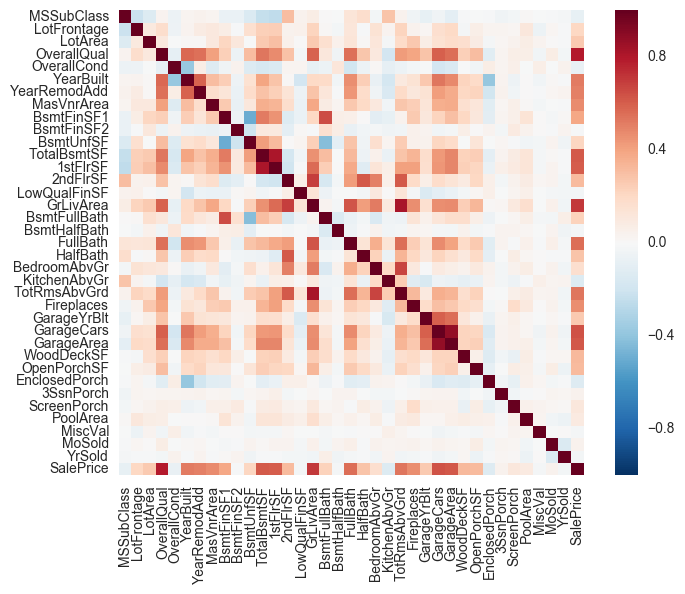

In [379]:
# After dealing with null values, let's get into correlation matrix!
corr = train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, square=True)

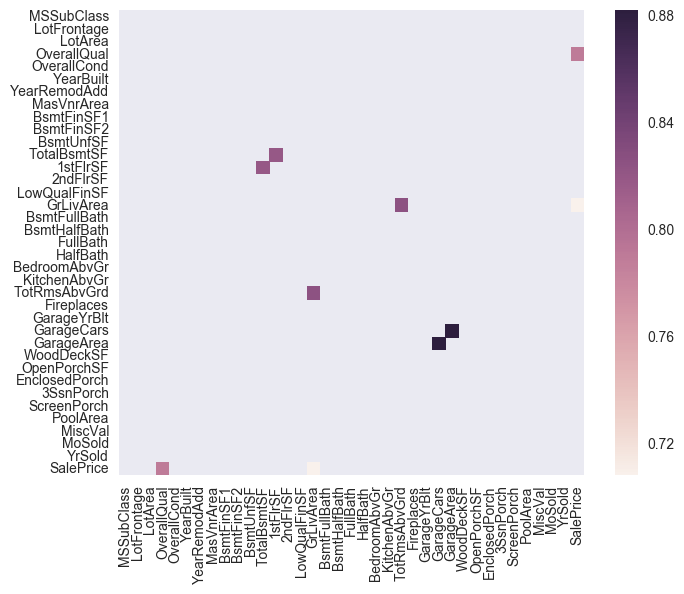

In [380]:
# get the df with high correlation
high_corr = corr[corr > 0.7][corr < 1]
high_corr_index = np.argwhere(high_corr.notnull().values).tolist()  # get its' index
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr, square=True)

In [381]:
for index in high_corr_index:
    if index[0] >= index[1]:
        continue
    if corr.columns[index[0]] == 'SalePrice' or corr.columns[index[1]] == 'SalePrice':
        continue
    if corr.iloc[-1, index[0]] > corr.iloc[-1, index[1]]:
        # preserver the one with larger correlation with saleprice as feature
        df.drop(corr.columns[index[1]], inplace=True, axis=1, errors='ignore')
        print('drop:', corr.columns[index[1]])
    else:
        df.drop(corr.columns[index[0]], inplace=True, axis=1, errors='ignore')
        print('drop:', corr.columns[index[0]])

drop: 1stFlrSF
drop: TotRmsAbvGrd
drop: GarageArea


In [382]:
df.shape

(2919, 74)

According to the data_desciption file,
we can know that some columns with numeric values do not have ordinal meaning.
For instance, numbers in MSSubClass just mean that they're different type of house.
So we have to process these columns first.
non-ordinal meaning: MSSubClass, YearBuilt, YearRemodAdd, MoSold, YrSold

In [383]:
df['MSSubClass'] = df['MSSubClass'].astype(object)

In [384]:
# Let's start with numeric columns
numeric = df.select_dtypes(include=[np.number])

In [385]:
numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [386]:
# For skewness-related transformation, see: http://fmwww.bc.edu/repec/bocode/t/transint.html
# do standlerization
for col in numeric.columns:
    # handle with skew data
    df[col] = StandardScaler().fit_transform(df[col][:,np.newaxis])
    # right skew, add a constant since we cannot have negative value in log.
    k = min(df[col])
    if df[col].skew() > 1.6:
        df[col] = np.log(df[col] + 1 - k)
    # left skew
    k = max(df[col]) + 1
    if df[col].skew() < 1.6:
        df[col] = np.sqrt(k - df[col])

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [387]:
df = pd.get_dummies(df, drop_first=True)

In [388]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.899709,1.921325,1.768645,2.143381,1.109562,1.155455,1.599141,3.440955,0.0,2.444107,...,0,0,0,0,1,0,0,0,1,0
1,2.821388,1.902049,1.958947,1.377868,1.456922,1.620961,1.815849,3.353067,0.0,2.380919,...,0,0,0,0,1,0,0,0,1,0
2,2.884215,1.876357,1.768645,2.143381,1.138931,1.175987,1.628601,3.510431,0.0,2.308136,...,0,0,0,0,1,0,0,0,1,0
3,2.925351,1.902862,1.768645,2.143381,2.033897,1.707256,1.815849,3.593862,0.0,2.255286,...,0,0,0,0,1,0,0,0,0,0
4,2.800133,1.834331,1.555229,2.143381,1.153336,1.216010,1.487633,3.457185,0.0,2.280368,...,0,0,0,0,1,0,0,0,1,0


In [389]:
train = df.iloc[:train.shape[0], :]

In [390]:
test = df.iloc[train.shape[0]:, :]

In [391]:
train = train.assign(SalePrice = SalePrice)

In [392]:
if False:
    train.to_csv('transformed_train.csv', index=False)
    test.to_csv('transformed_test.csv', index=False)

In [393]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,2.899709,1.921325,1.768645,2.143381,1.109562,1.155455,1.599141,3.440955,0.0,2.444107,...,0,0,0,1,0,0,0,1,0,208500
1,2.821388,1.902049,1.958947,1.377868,1.456922,1.620961,1.815849,3.353067,0.0,2.380919,...,0,0,0,1,0,0,0,1,0,181500
2,2.884215,1.876357,1.768645,2.143381,1.138931,1.175987,1.628601,3.510431,0.0,2.308136,...,0,0,0,1,0,0,0,1,0,223500
3,2.925351,1.902862,1.768645,2.143381,2.033897,1.707256,1.815849,3.593862,0.0,2.255286,...,0,0,0,1,0,0,0,0,0,140000
4,2.800133,1.834331,1.555229,2.143381,1.153336,1.216010,1.487633,3.457185,0.0,2.280368,...,0,0,0,1,0,0,0,1,0,250000


In [312]:
# apply log transformation to saleprice
train['SalePrice'] = np.log(train['SalePrice'])

In [334]:
# finish preparing data.
# Let's start to train and model!
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import xgboost as xgb
import operator

In [320]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, :-1], train.iloc[:, -1], test_size=0.33, random_state=20)

In [326]:
clf = SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum(np.abs(y_test - y_pred)))

46.6369822647


In [332]:
# find the best parameter: 4.82 from experiment
init = 0.01
cs = []
accs = []
for i in range(1, 1001):
    if i % 100 == 0:
        print(i)
    c = i*init
    clf = SVR(kernel='rbf', C=c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = sum(np.abs(y_test - y_pred))
    cs.append(c)
    accs.append(acc)

100
200
300
400
500
600
700
800
900
1000


best performance: 43.7866362802 C: 4.82


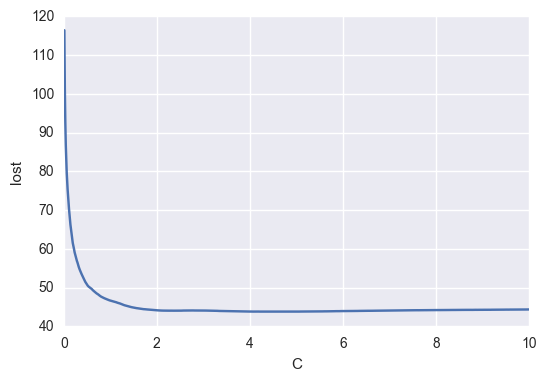

In [337]:
index, value = min(enumerate(accs), key=operator.itemgetter(1))
print("best performance:", value, "C:", cs[index])
plt.xlabel("C")
plt.ylabel("lost")
plt.plot(cs, accs)
plt.show()

In [339]:
# use the selected parameter to do prediction
clf = SVR(C=4.82)
clf.fit(train.iloc[:, :-1], train.iloc[:, -1])
log_result = clf.predict(test)
result = np.exp(log_result)

In [355]:
result[:, np.newaxis].shape

(1459, 1)

In [363]:
# id starts from 1461
a = pd.DataFrame({'Id': list(range(1461, result.shape[0]+1461)),'SalePrice': result})
a.to_csv('svm_submission.csv', index=False)

In [ ]:
# read in data
xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
